# 작업할 데이터 받기

In [1]:
df_pos = pd.read_csv('df_OLS.csv', encoding='utf-8-sig', index_col=0)

In [3]:
df_pos

,position,age,rating,value,follower,goals_assists,passes_total,passes_accuracy,tackles_total,tackles_blocks,...,penalty_missed,games_lineups,games_played,hw,shotsOnTotal_goalsTotal,goasConceded_penaltySaved,goalsAssist_passesKey,duelsWonTotal,dribblesAtmptsSuc,gamesApperance_sub
0,2.000000,25.000000,2.333333,20.0,67879,0.0000,22.1875,3.2985,1.2112,0.1417,...,0.0000,0.9277,77.6111,-0.392274,-1.612784,-0.285146,-1.738633,-1.924682,-0.276160,2.236486
1,4.000000,27.000000,5.250000,32.0,740918,0.0985,12.3211,4.0184,0.4629,0.0985,...,0.0295,0.9947,101.5333,0.141002,1.822336,-0.285146,-0.383844,1.580211,-0.167363,-1.808610
2,3.000000,24.000000,6.000000,24.0,601838,0.0123,58.0175,13.4528,1.0301,0.3802,...,0.0000,1.0056,81.5444,-0.580321,-1.817034,-0.285146,-1.744717,-0.246207,-1.650098,0.163037
3,4.000000,25.000000,7.000000,32.0,652886,0.2168,23.4897,9.1609,0.7758,0.1141,...,0.0000,0.9697,87.6556,0.741866,0.551484,-0.285146,1.006489,1.352523,2.219212,4.054520
4,2.000000,32.000000,4.833333,32.0,11513791,0.3745,32.2437,6.1453,0.4321,0.0480,...,0.0096,1.0754,104.1444,-0.008107,2.104335,-0.285146,2.797874,-1.700012,0.984943,0.382540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,4.000000,28.000000,3.888889,44.0,1028085,0.1187,21.4995,4.2611,1.1758,0.0216,...,0.0000,0.9924,92.7000,0.580254,0.448326,-0.285146,0.257094,3.975849,4.594321,-2.079535
367,3.769231,23.076923,1.615385,24.0,57900,0.0107,4.1158,2.3642,0.1397,0.0215,...,0.0107,1.0531,93.0556,-1.164444,-0.497805,-0.285146,-1.725265,-2.941022,-1.572458,0.538228
368,4.000000,32.000000,6.153846,22.5,8983450,0.2798,38.4786,8.6552,0.7696,0.0300,...,0.0000,1.0294,100.0556,0.096205,1.152975,-0.285146,2.862916,0.141037,2.276803,2.749932
369,4.000000,26.000000,6.545455,24.0,109000,0.2662,16.8656,7.4315,0.3936,0.0695,...,0.0000,0.9492,86.3889,-1.160608,0.759456,-0.285146,1.050869,2.395041,-0.209080,2.181788


# train_test_split으로 검증용 데이터 분할 후, OLS

In [4]:
from sklearn.model_selection import train_test_split

dfX = df_pos.drop(['value'], axis=1)
dfy = df_pos['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     7.160
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           5.83e-19
Time:                        17:52:31   Log-Likelihood:                -1086.1
No. Observations:                 259   AIC:                             2230.
Df Residuals:                     230   BIC:                             2333.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [5]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.18940428044906554

# 높은 P값 feature 제거 - 1차

In [6]:
df_OLS_1 = df_pos.drop(['position'], axis=1)
len(df_pos.columns), len(df_OLS_1.columns)

(29, 28)

In [7]:
from sklearn.model_selection import train_test_split

dfX = df_OLS_1.drop(['value'], axis=1)
dfy = df_OLS_1['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     7.455
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.13e-19
Time:                        17:53:03   Log-Likelihood:                -1086.1
No. Observations:                 259   AIC:                             2228.
Df Residuals:                     231   BIC:                             2328.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [8]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.1889950484895464

# 높은 P값 feature 제거 - 2차

In [9]:
df_OLS_2 = df_OLS_1.drop(['goasConceded_penaltySaved', 'duelsWonTotal'], axis=1)
len(df_OLS_1.columns), len(df_OLS_2.columns)

(28, 26)

In [10]:
from sklearn.model_selection import train_test_split

dfX = df_OLS_2.drop(['value'], axis=1)
dfy = df_OLS_2['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     8.111
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.74e-20
Time:                        17:53:21   Log-Likelihood:                -1086.2
No. Observations:                 259   AIC:                             2224.
Df Residuals:                     233   BIC:                             2317.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [11]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.18832378638393987

# 높은 P값 feature 제거 - 3차

In [12]:
df_OLS_3 = df_OLS_2.drop(['cards_yellowred', 'penalty_missed', 'rating'], axis=1)
len(df_OLS_2.columns), len(df_OLS_3.columns)

(26, 23)

In [13]:
from sklearn.model_selection import train_test_split

dfX = df_OLS_3.drop(['value'], axis=1)
dfy = df_OLS_3['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     9.287
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.27e-21
Time:                        17:54:03   Log-Likelihood:                -1086.5
No. Observations:                 259   AIC:                             2219.
Df Residuals:                     236   BIC:                             2301.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [14]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.18520935678592632

# 높은 P값 feature 제거 - 4차

In [15]:
df_OLS_4 = df_OLS_3.drop(['tackles_interceptions'], axis=1)
len(df_OLS_3.columns), len(df_OLS_4.columns)

(23, 22)

In [16]:
from sklearn.model_selection import train_test_split

dfX = df_OLS_4.drop(['value'], axis=1)
dfy = df_OLS_4['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     9.723
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           5.11e-22
Time:                        17:55:15   Log-Likelihood:                -1086.8
No. Observations:                 259   AIC:                             2218.
Df Residuals:                     237   BIC:                             2296.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [17]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.18656502495434113

# 높은 P값 feature 제거 - 5차

In [21]:
df_OLS_5 = df_OLS_4.drop(['cards_yellow'], axis=1)
len(df_OLS_4.columns), len(df_OLS_5.columns)

(22, 21)

In [22]:
from sklearn.model_selection import train_test_split

dfX = df_OLS_5.drop(['value'], axis=1)
dfy = df_OLS_5['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     10.19
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.16e-22
Time:                        17:59:46   Log-Likelihood:                -1087.2
No. Observations:                 259   AIC:                             2216.
Df Residuals:                     238   BIC:                             2291.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [17]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.18656502495434113

# 높은 P값 feature 제거 - 6차

In [23]:
df_OLS_6 = df_OLS_5.drop(['tackles_total', 'games_lineups', 'hw'], axis=1)
len(df_OLS_5.columns), len(df_OLS_6.columns)

(21, 18)

In [24]:
from sklearn.model_selection import train_test_split

dfX = df_OLS_6.drop(['value'], axis=1)
dfy = df_OLS_6['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     11.86
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.69e-23
Time:                        18:01:31   Log-Likelihood:                -1088.5
No. Observations:                 259   AIC:                             2213.
Df Residuals:                     241   BIC:                             2277.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [25]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.1462629043025695

# 높은 P값 feature 제거 - 7차

In [27]:
df_OLS_7 = df_OLS_6.drop(['fouls_committed'], axis=1)
len(df_OLS_6.columns), len(df_OLS_7.columns)

(18, 17)

In [28]:
from sklearn.model_selection import train_test_split

dfX = df_OLS_7.drop(['value'], axis=1)
dfy = df_OLS_7['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     12.58
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           6.18e-24
Time:                        18:03:13   Log-Likelihood:                -1088.8
No. Observations:                 259   AIC:                             2212.
Df Residuals:                     242   BIC:                             2272.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [29]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.1306094046313293

# 높은 P값 feature 제거 - 8차

In [30]:
df_OLS_8 = df_OLS_7.drop(['penalty_commited', 'penalty_success'], axis=1)
len(df_OLS_7.columns), len(df_OLS_8.columns)

(17, 15)

In [31]:
from sklearn.model_selection import train_test_split

dfX = df_OLS_8.drop(['value'], axis=1)
dfy = df_OLS_8['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     13.88
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           4.07e-24
Time:                        18:05:27   Log-Likelihood:                -1091.4
No. Observations:                 259   AIC:                             2213.
Df Residuals:                     244   BIC:                             2266.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [32]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.12741322726103432

# 모델 정리 완료

# Model Performance 향상 작업

In [35]:
from sklearn.model_selection import train_test_split

dfX = df_OLS_8.drop(['value'], axis=1)
dfy = df_OLS_8['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ scale(age) +  + scale(follower) + scale(goals_assists) + scale(passes_total) +\
                            scale(passes_accuracy) + scale(tackles_blocks) + scale(fouls_drawn) + scale(cards_red) +\
                            scale(penalty_won) + scale(games_played) + scale(shotsOnTotal_goalsTotal) +\
                            scale(goalsAssist_passesKey) + scale(dribblesAtmptsSuc) + scale(gamesApperance_sub)", data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     13.88
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           4.07e-24
Time:                        18:09:20   Log-Likelihood:                -1091.4
No. Observations:                 259   AIC:                             2213.
Df Residuals:                     244   BIC:                             2266.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [36]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
scale(age),1.0,65.431136,65.431136,0.230237,6.317779e-01
scale(follower),1.0,25118.697040,25118.697040,88.386930,4.089606e-18
scale(goals_assists),1.0,5831.283670,5831.283670,20.518949,9.243855e-06
scale(passes_total),1.0,138.855091,138.855091,0.488599,4.852186e-01
scale(passes_accuracy),1.0,137.011237,137.011237,0.482111,4.881282e-01
scale(tackles_blocks),1.0,1130.919278,1130.919278,3.979445,4.717114e-02
scale(fouls_drawn),1.0,734.895524,734.895524,2.585929,1.091103e-01
scale(cards_red),1.0,1402.122095,1402.122095,4.933746,2.725562e-02
scale(penalty_won),1.0,5203.982654,5203.982654,18.311621,2.695773e-05
scale(games_played),1.0,10093.010371,10093.010371,35.514987,8.801315e-09


In [39]:
df_OLS_8

,age,value,follower,goals_assists,passes_total,passes_accuracy,tackles_blocks,fouls_drawn,cards_red,penalty_won,games_played,shotsOnTotal_goalsTotal,goalsAssist_passesKey,dribblesAtmptsSuc,gamesApperance_sub
0,25.000000,20.0,67879,0.0000,22.1875,3.2985,0.1417,0.5283,0.0000,0.0000,77.6111,-1.612784,-1.738633,-0.276160,2.236486
1,27.000000,32.0,740918,0.0985,12.3211,4.0184,0.0985,2.8562,0.0000,0.0394,101.5333,1.822336,-0.383844,-0.167363,-1.808610
2,24.000000,24.0,601838,0.0123,58.0175,13.4528,0.3802,0.5641,0.0000,0.0000,81.5444,-1.817034,-1.744717,-1.650098,0.163037
3,25.000000,32.0,652886,0.2168,23.4897,9.1609,0.1141,1.6086,0.0114,0.0114,87.6556,0.551484,1.006489,2.219212,4.054520
4,32.000000,32.0,11513791,0.3745,32.2437,6.1453,0.0480,0.6433,0.0000,0.0096,104.1444,2.104335,2.797874,0.984943,0.382540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,28.000000,44.0,1028085,0.1187,21.4995,4.2611,0.0216,3.0097,0.0000,0.1187,92.7000,0.448326,0.257094,4.594321,-2.079535
367,23.076923,24.0,57900,0.0107,4.1158,2.3642,0.0215,0.2794,0.0107,0.0000,93.0556,-0.497805,-1.725265,-1.572458,0.538228
368,32.000000,22.5,8983450,0.2798,38.4786,8.6552,0.0300,1.6691,0.0000,0.0500,100.0556,1.152975,2.862916,2.276803,2.749932
369,26.000000,24.0,109000,0.2662,16.8656,7.4315,0.0695,1.8637,0.0000,0.0463,86.3889,0.759456,1.050869,-0.209080,2.181788


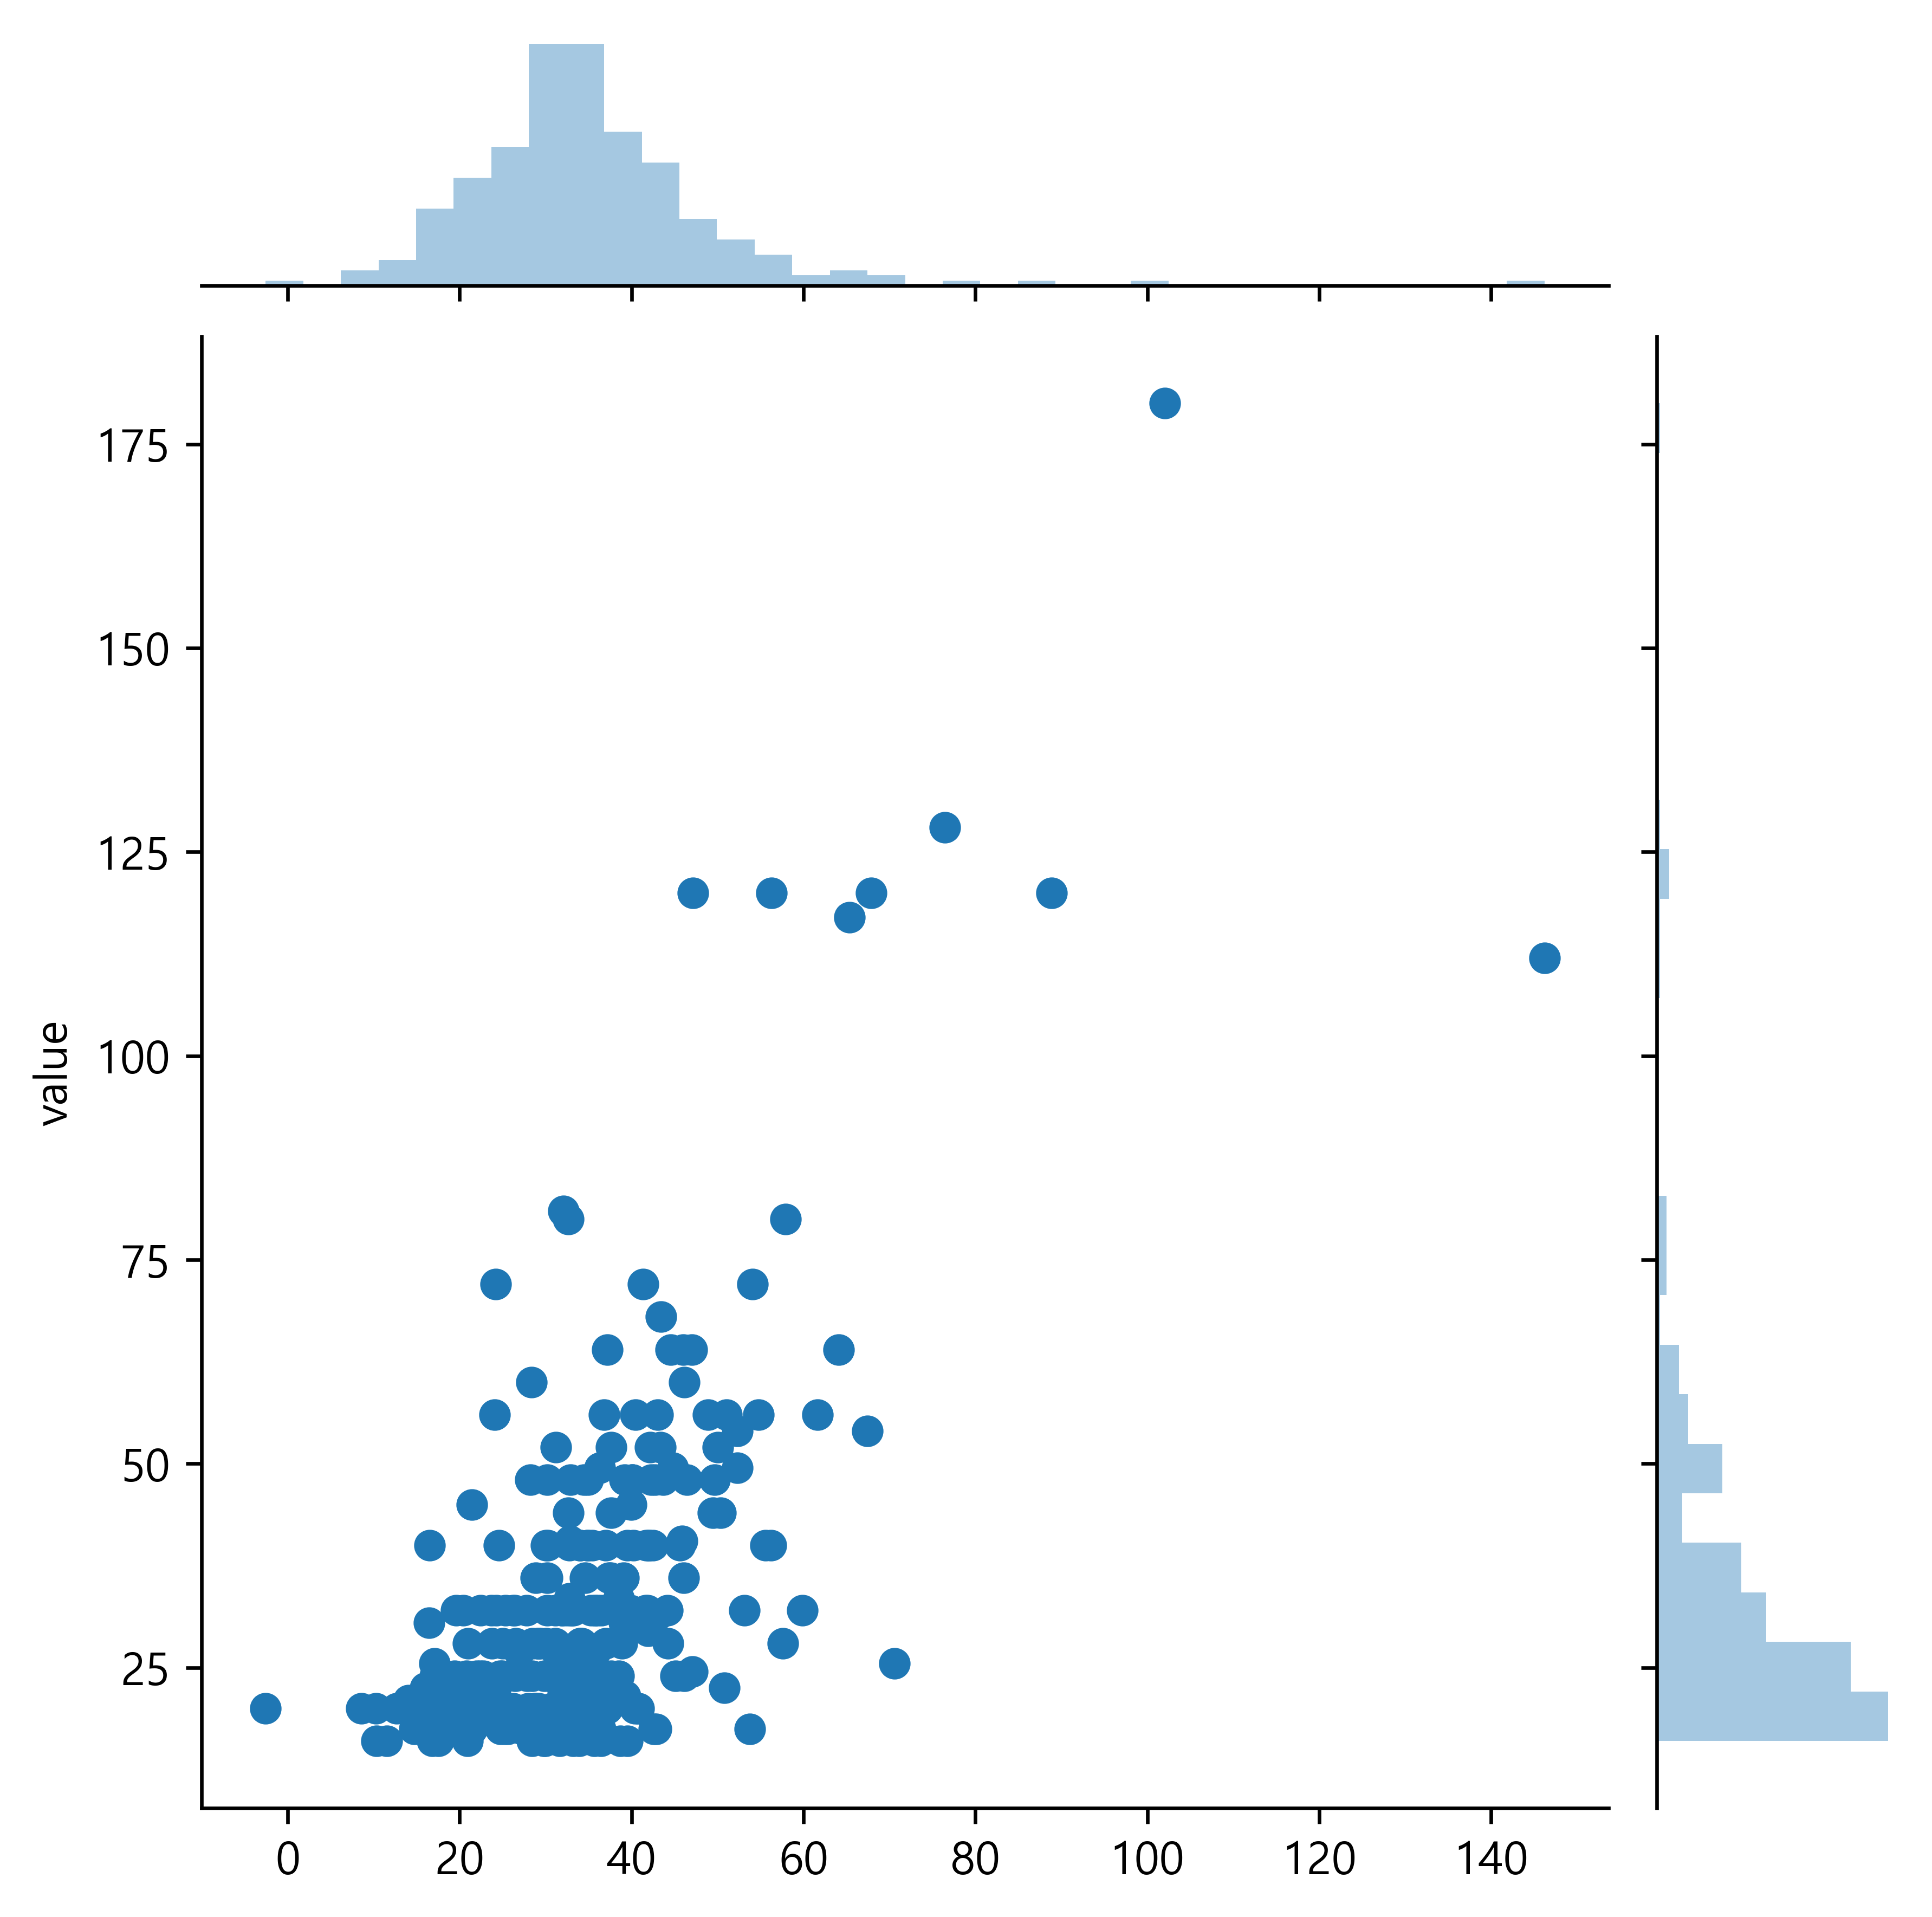

In [42]:
sns.jointplot(result.fittedvalues, df_train.value)
plt.show()

# 아웃라이어 확인

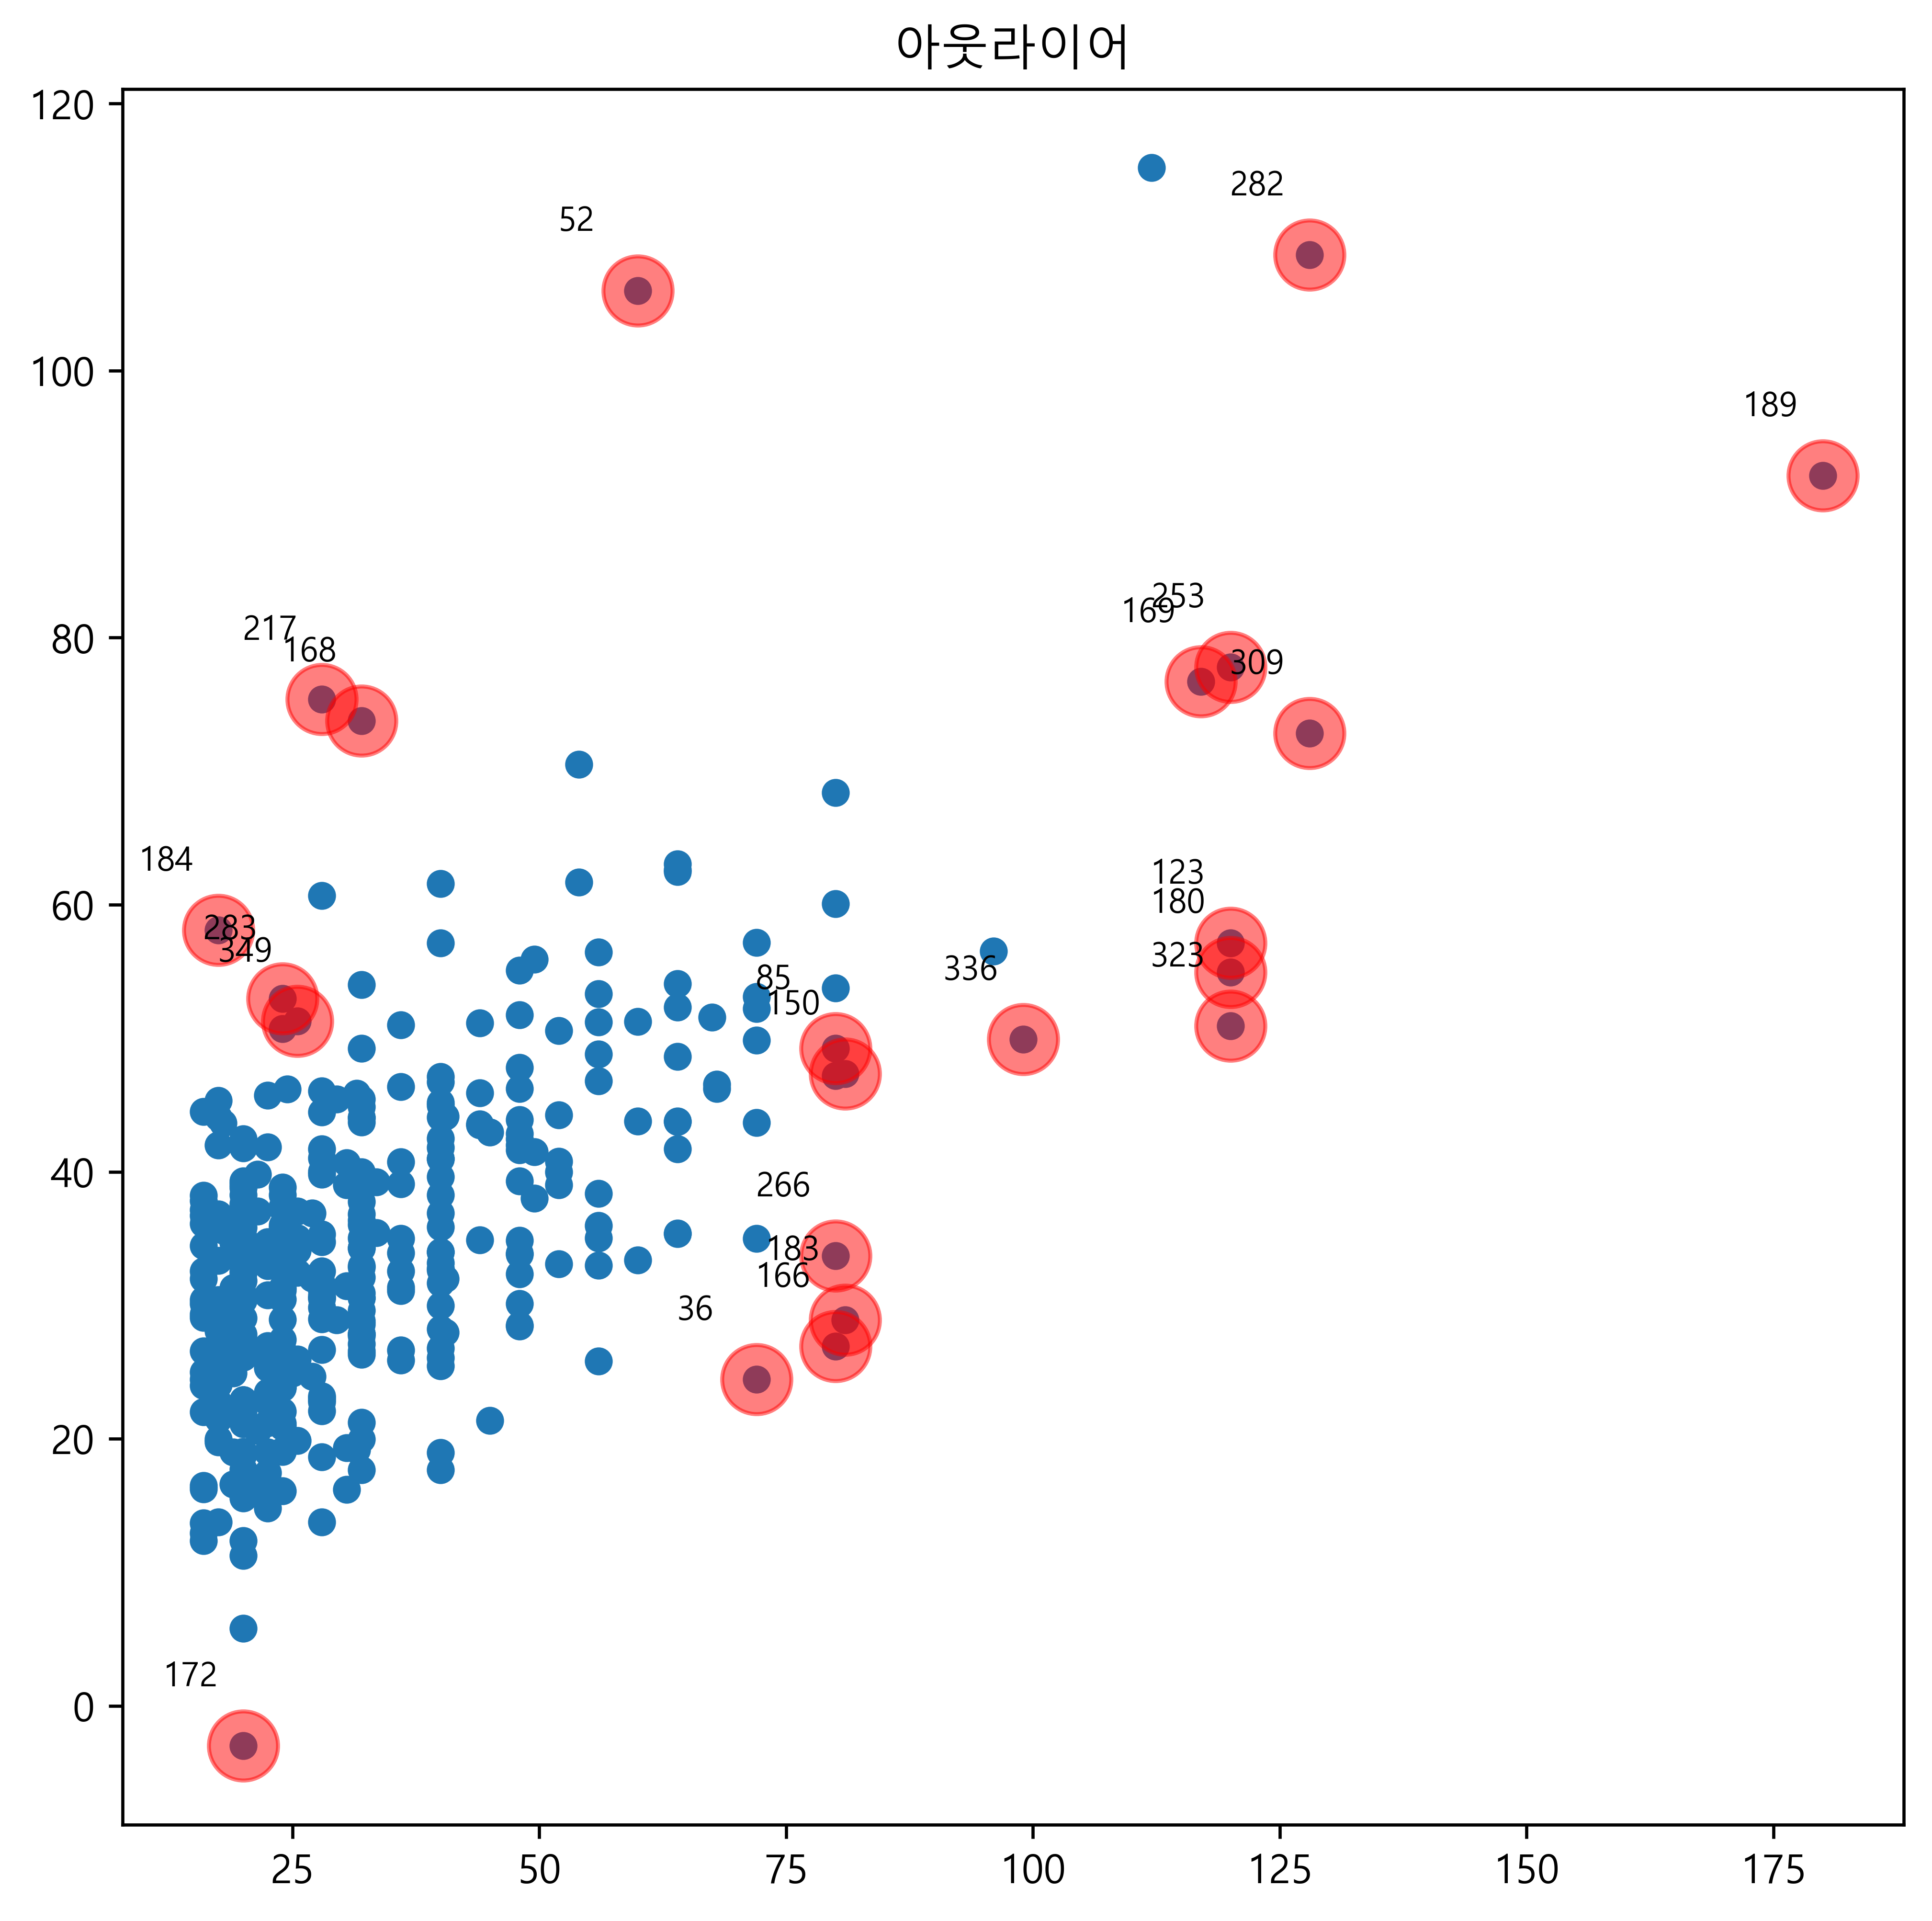

[ 36  52  85 123 150 166 168 169 172 180 183 184 189 217 253 266 282 283
 309 323 336 349]


In [70]:
from statsmodels.graphics import utils

dfX0 = df_OLS_8.drop('value', axis=1)
dfX = sm.add_constant(dfX0)
dfy = df_pos['value']

model_p = sm.OLS(dfy, dfX)
result_p = model_p.fit()
pred = result_p.predict(dfX)

influence_p = result_p.get_influence()
cooks_d2, pvals = influence_p.cooks_distance
K = influence_p.k_vars
fox_cr = 4 / (len(dfy) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, list(zip(dfy[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("아웃라이어")
plt.show()
print(idx)

In [74]:
df_OLS_8

,age,value,follower,goals_assists,passes_total,passes_accuracy,tackles_blocks,fouls_drawn,cards_red,penalty_won,games_played,shotsOnTotal_goalsTotal,goalsAssist_passesKey,dribblesAtmptsSuc,gamesApperance_sub
0,25.000000,20.0,67879,0.0000,22.1875,3.2985,0.1417,0.5283,0.0000,0.0000,77.6111,-1.612784,-1.738633,-0.276160,2.236486
1,27.000000,32.0,740918,0.0985,12.3211,4.0184,0.0985,2.8562,0.0000,0.0394,101.5333,1.822336,-0.383844,-0.167363,-1.808610
2,24.000000,24.0,601838,0.0123,58.0175,13.4528,0.3802,0.5641,0.0000,0.0000,81.5444,-1.817034,-1.744717,-1.650098,0.163037
3,25.000000,32.0,652886,0.2168,23.4897,9.1609,0.1141,1.6086,0.0114,0.0114,87.6556,0.551484,1.006489,2.219212,4.054520
4,32.000000,32.0,11513791,0.3745,32.2437,6.1453,0.0480,0.6433,0.0000,0.0096,104.1444,2.104335,2.797874,0.984943,0.382540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,28.000000,44.0,1028085,0.1187,21.4995,4.2611,0.0216,3.0097,0.0000,0.1187,92.7000,0.448326,0.257094,4.594321,-2.079535
367,23.076923,24.0,57900,0.0107,4.1158,2.3642,0.0215,0.2794,0.0107,0.0000,93.0556,-0.497805,-1.725265,-1.572458,0.538228
368,32.000000,22.5,8983450,0.2798,38.4786,8.6552,0.0300,1.6691,0.0000,0.0500,100.0556,1.152975,2.862916,2.276803,2.749932
369,26.000000,24.0,109000,0.2662,16.8656,7.4315,0.0695,1.8637,0.0000,0.0463,86.3889,0.759456,1.050869,-0.209080,2.181788


# 아웃라이어 제거 후 OLS

In [71]:
idx2 = list(set(range(len(dfX))).difference(idx))
len(idx2)

349

In [76]:
df_out = df_OLS_8.iloc[idx2].reset_index(drop=True)
df_out

,age,value,follower,goals_assists,passes_total,passes_accuracy,tackles_blocks,fouls_drawn,cards_red,penalty_won,games_played,shotsOnTotal_goalsTotal,goalsAssist_passesKey,dribblesAtmptsSuc,gamesApperance_sub
0,25.000000,20.0,67879,0.0000,22.1875,3.2985,0.1417,0.5283,0.0000,0.0000,77.6111,-1.612784,-1.738633,-0.276160,2.236486
1,27.000000,32.0,740918,0.0985,12.3211,4.0184,0.0985,2.8562,0.0000,0.0394,101.5333,1.822336,-0.383844,-0.167363,-1.808610
2,24.000000,24.0,601838,0.0123,58.0175,13.4528,0.3802,0.5641,0.0000,0.0000,81.5444,-1.817034,-1.744717,-1.650098,0.163037
3,25.000000,32.0,652886,0.2168,23.4897,9.1609,0.1141,1.6086,0.0114,0.0114,87.6556,0.551484,1.006489,2.219212,4.054520
4,32.000000,32.0,11513791,0.3745,32.2437,6.1453,0.0480,0.6433,0.0000,0.0096,104.1444,2.104335,2.797874,0.984943,0.382540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,28.000000,44.0,1028085,0.1187,21.4995,4.2611,0.0216,3.0097,0.0000,0.1187,92.7000,0.448326,0.257094,4.594321,-2.079535
345,23.076923,24.0,57900,0.0107,4.1158,2.3642,0.0215,0.2794,0.0107,0.0000,93.0556,-0.497805,-1.725265,-1.572458,0.538228
346,32.000000,22.5,8983450,0.2798,38.4786,8.6552,0.0300,1.6691,0.0000,0.0500,100.0556,1.152975,2.862916,2.276803,2.749932
347,26.000000,24.0,109000,0.2662,16.8656,7.4315,0.0695,1.8637,0.0000,0.0463,86.3889,0.759456,1.050869,-0.209080,2.181788


In [77]:
from sklearn.model_selection import train_test_split

dfX = df_out.drop(['value'], axis=1)
dfy = df_out['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     15.55
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           3.13e-26
Time:                        18:50:32   Log-Likelihood:                -943.83
No. Observations:                 244   AIC:                             1918.
Df Residuals:                     229   BIC:                             1970.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [78]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.3533074470022677

# 높은 P값 feature 제거 - 1차

In [79]:
df_out_1 = df_out.drop(['cards_red'], axis=1)
len(df_out.columns), len(df_out_1.columns)

(15, 14)

In [83]:
from sklearn.model_selection import train_test_split

dfX = df_out_1.drop(['value'], axis=1)
dfy = df_out_1['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     16.81
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           7.65e-27
Time:                        18:53:19   Log-Likelihood:                -943.86
No. Observations:                 244   AIC:                             1916.
Df Residuals:                     230   BIC:                             1965.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [84]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.3494203675192411

# 높은 P값 feature 제거 - 2차

In [81]:
df_out_2 = df_out_1.drop(['dribblesAtmptsSuc'], axis=1)
len(df_out_1.columns), len(df_out_2.columns)

(14, 13)

In [85]:
from sklearn.model_selection import train_test_split

dfX = df_out_2.drop(['value'], axis=1)
dfy = df_out_2['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     17.91
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           5.33e-27
Time:                        18:53:29   Log-Likelihood:                -945.10
No. Observations:                 244   AIC:                             1916.
Df Residuals:                     231   BIC:                             1962.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [86]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.35843731400261103

# 높은 P값 feature 제거 - 3차

In [87]:
df_out_3 = df_out_2.drop(['fouls_drawn'], axis=1)
len(df_out_2.columns), len(df_out_3.columns)

(13, 12)

In [88]:
from sklearn.model_selection import train_test_split

dfX = df_out_3.drop(['value'], axis=1)
dfy = df_out_3['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     19.18
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           3.99e-27
Time:                        18:54:34   Log-Likelihood:                -946.45
No. Observations:                 244   AIC:                             1917.
Df Residuals:                     232   BIC:                             1959.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [89]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.35727501899396663

# 높은 P값 feature 제거 - 4차

In [90]:
df_out_4 = df_out_3.drop(['penalty_won'], axis=1)
len(df_out_3.columns), len(df_out_4.columns)

(12, 11)

In [96]:
from sklearn.model_selection import train_test_split

dfX = df_out_4.drop(['value'], axis=1)
dfy = df_out_4['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     20.84
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.04e-27
Time:                        18:59:38   Log-Likelihood:                -947.41
No. Observations:                 244   AIC:                             1917.
Df Residuals:                     233   BIC:                             1955.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [97]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.3616159298983974

# 검증 1차

In [98]:
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_out_4)):
    df_train = df_out_4.iloc[idx_train]
    df_test = df_out_4.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ scale(age) + scale(follower) + scale(goals_assists) + scale(passes_total) + \
                                scale(passes_accuracy) + scale(tackles_blocks) + scale(games_played) + \
                                scale(shotsOnTotal_goalsTotal) + scale(goalsAssist_passesKey) + \
                                scale(gamesApperance_sub)", data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.48014716, 검증 R2 = -0.02631078
학습 R2 = 0.45256654, 검증 R2 = 0.45983890
학습 R2 = 0.44541481, 검증 R2 = 0.53003177
학습 R2 = 0.46306901, 검증 R2 = 0.38054600
학습 R2 = 0.45747735, 검증 R2 = 0.41775685
학습 R2 = 0.46918744, 검증 R2 = 0.24803024
학습 R2 = 0.46396049, 검증 R2 = 0.30295417
학습 R2 = 0.46308031, 검증 R2 = 0.35943677
학습 R2 = 0.46125126, 검증 R2 = 0.36880613
학습 R2 = 0.41043781, 검증 R2 = 0.53969084


# 검증 2차

In [99]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm

class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
        
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()
        
    def predict(self, new_data):
        return self.result.predict(new_data)

In [100]:
from sklearn.model_selection import cross_val_score

model = StatsmodelsOLS("value ~ scale(age) + scale(follower) + scale(goals_assists) + scale(passes_total) + \
                                scale(passes_accuracy) + scale(tackles_blocks) + scale(games_played) + \
                                scale(shotsOnTotal_goalsTotal) + scale(goalsAssist_passesKey) + \
                                scale(gamesApperance_sub)")
cv = KFold(10, shuffle=True, random_state=0)
cross_val_score(model, dfX, dfy, scoring="r2", cv=cv)

array([-0.02631078,  0.4598389 ,  0.53003177,  0.380546  ,  0.41775685,
        0.24803024,  0.30295417,  0.35943677,  0.36880613,  0.53969084])